## Coding Exercise #0514

#### 1. Document classification with LSTM network:

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets.reuters import load_data, get_word_index       # Reuters news data.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
warnings.filterwarnings('ignore')                  # Turn the warnings off.
%matplotlib inline

#### 1.1. Read in the data:

In [2]:
n_words = 1000                                        # Size of the vocabulary.
(X_train, y_train), (X_test, y_test) = load_data(num_words = n_words, test_split = 0.3)
n_train_size = X_train.shape[0]

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Check for the shapes.
print("-"*50)
print("Training data X shape: {}".format(X_train.shape))
print("Training data y shape: {}".format(y_train.shape))
print("-"*50)
print("Test data X shape: {}".format(X_test.shape))
print("Test data y shape: {}".format(y_test.shape))
print("-"*50)

--------------------------------------------------
Training data X shape: (7859,)
Training data y shape: (7859,)
--------------------------------------------------
Test data X shape: (3369,)
Test data y shape: (3369,)
--------------------------------------------------


#### 1.2. Explore the data:

In [4]:
# Number of unique values of y = Number of categories of the newswires.
n_cat = pd.Series(y_train).nunique()
n_cat

46

In [5]:
# Download the dictionary to translate the indices.
my_dict = get_word_index(path='reuters_word_index.json')

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Exchange the 'key' and 'value'.
my_dict_inv = {v:k for k,v in my_dict.items()}

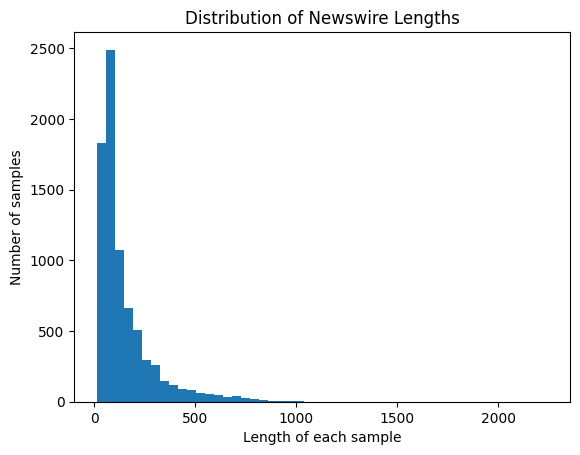

In [7]:
lengths = [len(x) for x in X_train]
plt.hist(lengths, bins=50)
plt.title("Distribution of Newswire Lengths")
plt.xlabel("Length of each sample")
plt.ylabel("Number of samples")
plt.show()


#### 1.3. Data preprocessing:

In [8]:
# Padding: newswire lengths are uniformly matched to maxlen.
# Cut away if longer than maxlen and fill with 0s if shorter than maxlen.
X_train = sequence.pad_sequences(X_train, maxlen = 100)
X_test = sequence.pad_sequences(X_test, maxlen = 100)

In [9]:
# Apply one-hot-encoding to the y variable.
y = np.concatenate([y_train,y_test],axis=0)
y = to_categorical(y,46)
y_train = y[:n_train_size,:]
y_test = y[n_train_size:,:]

#### 1.4. Define the model:

In [10]:
n_neurons = 100                   # Neurons within each memory cell.
n_input = 100                     # Dimension of the embeding space.

In [14]:
# LSTM network model.
model = Sequential([
    Embedding(input_dim=n_words, output_dim=n_input),  # Embedding layer
    Bidirectional(LSTM(64)),          # LSTM layer
    Dropout(0.2),                                       # Dropout for regularization
    Dense(n_cat, activation='softmax')                 # Output layer
])

In [13]:
# View the summary.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### 1.5. Define the optimizer and compile:

In [21]:
n_epochs = 5                      # Number of epochs.
batch_size = 64                    # Size of each batch.
learn_rate = 0.001                 # learning rate.

In [22]:
# Optimizer and compilation.
my_optimizer=Adam(learning_rate=learn_rate)
model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

#### 1.6. Train the model and visualize the history:

In [23]:
summary = model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split=0.2, verbose = 1)

Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 30s 260ms/step - accuracy: 0.5417 - loss: 1.7779 - val_accuracy: 0.5541 - val_loss: 1.6596
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.5910 - loss: 1.5759 - val_accuracy: 0.5859 - val_loss: 1.6151
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 23s 231ms/step - accuracy: 0.5968 - loss: 1.5677 - val_accuracy: 0.5954 - val_loss: 1.5293
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 42s 240ms/step - accuracy: 0.6243 - loss: 1.4255 - val_accuracy: 0.6139 - val_loss: 1.5150
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - accuracy: 0.6429 - loss: 1.3721 - val_accuracy: 0.6463 - val_loss: 1.4086


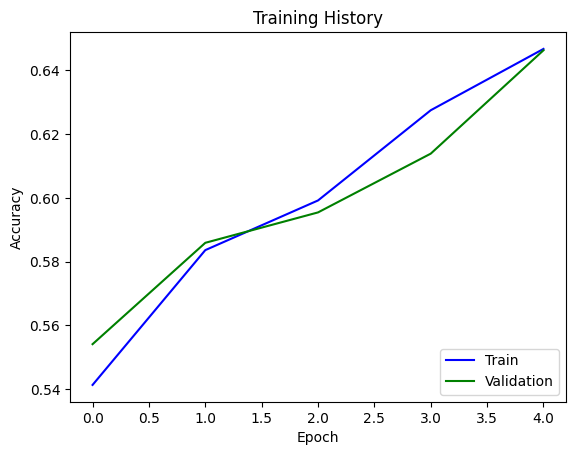

In [24]:
plt.plot(summary.history['accuracy'], c="b")
plt.plot(summary.history['val_accuracy'], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

#### 1.7. Testing:

In [26]:
ACC = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.638
